## MNIST Handwriting Recognizer

Import modules.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Import the trained model.

In [2]:
sess = tf.InteractiveSession()
saver = tf.train.import_meta_graph('double_cnn_export.meta')
saver.restore(sess, 'double_cnn_export')

x = tf.get_collection('input_image')[0]
p = tf.get_collection('prediction')[0]
keep_prob = tf.get_collection('keep_prob')[0]
h_conv1 = tf.get_collection('filters_first')[0]
h_conv2 = tf.get_collection('filters_second')[0]

Prepare JavaScript code for the hand writing canvas.

In [3]:
input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 143px; height: 144px;">
<canvas width="140" height="140"></canvas>
</div></td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>
</td>
</table>
"""

javascript = """
<script type="text/Javascript">
    var pixels = [];
    for (var i = 0; i < 28*28; i++) pixels[i] = 0
    var click = 0;

    var canvas = document.querySelector("canvas");
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons == 1) {
            click = 1;
            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);
            x = Math.floor(e.offsetY * 0.2)
            y = Math.floor(e.offsetX * 0.2) + 1
            for (var dy = 0; dy < 2; dy++){
                for (var dx = 0; dx < 2; dx++){
                    if ((x + dx < 28) && (y + dy < 28)){
                        pixels[(y+dy)+(x+dx)*28] = 1
                    }
                }
            }
        } else {
            if (click == 1) set_value()
            click = 0;
        }
    });
    
    function set_value(){
        var result = ""
        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","
        var kernel = IPython.notebook.kernel;
        kernel.execute("image = [" + result + "]");
    }
    
    function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
        canvas.getContext("2d").fillRect(0, 0, 140, 140);
        for (var i = 0; i < 28*28; i++) pixels[i] = 0
    }
</script>
"""

Run the JavaScript to accept a hand writing image.

In [6]:
from IPython.display import HTML
HTML(input_form + javascript)

Show the predition.

<Container object of 10 artists>

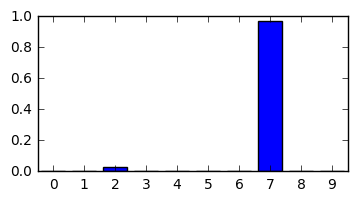

In [13]:
p_val = sess.run(p, feed_dict={x:[image], keep_prob:1.0})

fig = plt.figure(figsize=(4,2))
pred = p_val[0]
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks(range(10))
subplot.set_xlim(-0.5,9.5)
subplot.set_ylim(0,1)
subplot.bar(range(10), pred, align='center')

Show filtered images at the first layer.

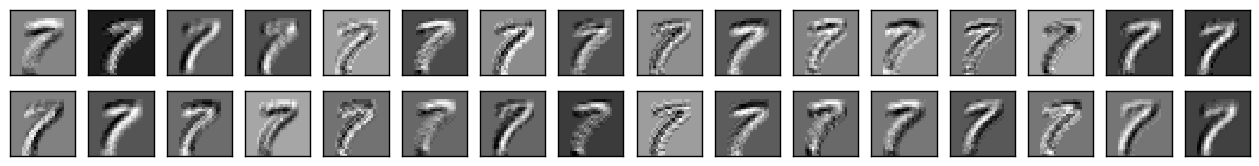

In [14]:
conv1_vals = sess.run(h_conv1, feed_dict={x:[image], keep_prob:1.0})

fig = plt.figure(figsize=(16,4))

for f in range(32):
    subplot = fig.add_subplot(4, 16, f+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv1_vals[0,:,:,f],
                   cmap=plt.cm.gray_r, interpolation='nearest') 

Show filtered images at the second layer.

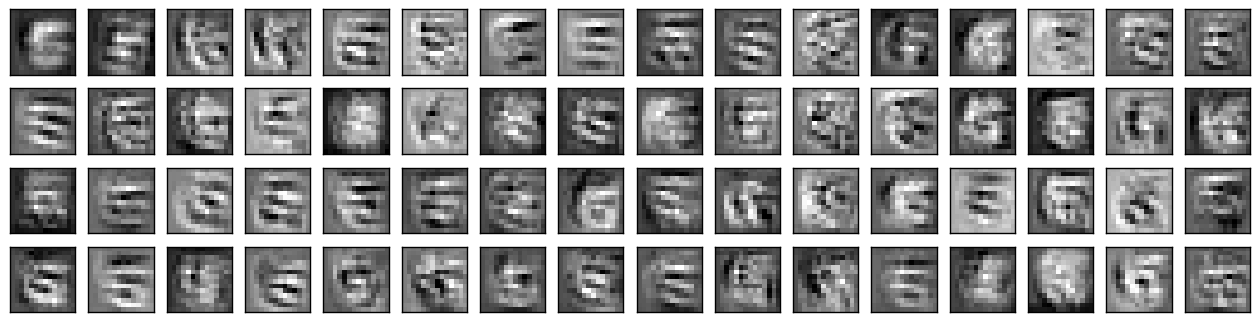

In [12]:
conv2_vals = sess.run(h_conv2, feed_dict={x:[image], keep_prob:1.0})

fig = plt.figure(figsize=(16,8))

for f in range(64):
    subplot = fig.add_subplot(8, 16, f+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv2_vals[0,:,:,f],
                   cmap=plt.cm.gray_r, interpolation='nearest') 